In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame()
rows = [29,86,80,166]
for j in range(1,33):
    if j == 24:
        continue
    data = pd.read_excel(f"./data/P{j}/val_aro.xls")
    extracted_rows = data.iloc[rows,:]
    df = pd.concat([df, extracted_rows], ignore_index=True)
df.head()

,image,Valence_score,Arousal_score
0,30,6,0
1,86,5,1
2,80,2,1
3,166,3,0
4,30,8,1


In [3]:
df['class'] = df['image'].apply(lambda x: "Pleasant" if x in [30, 86] else "unpleasant")
df.head()

,image,Valence_score,Arousal_score,class
0,30,6,0,Pleasant
1,86,5,1,Pleasant
2,80,2,1,unpleasant
3,166,3,0,unpleasant
4,30,8,1,Pleasant


In [4]:
df.drop("image",axis=1,inplace = True)

In [5]:
temp = df.groupby('class').mean()
meanvec = np.array(temp)
meanvec

array([[4.7027027 , 0.54054054],
       [4.56321839, 0.44827586]])

In [6]:
temp = df.groupby('class').std()
stdvec = np.array(temp)
stdvec

array([[2.35542948, 0.50522792],
       [2.33128944, 0.50020044]])

In [7]:
print("Distance between mean vectors: ", np.linalg.norm(meanvec[0] - meanvec[1]))

Distance between mean vectors:  0.16723828556628706


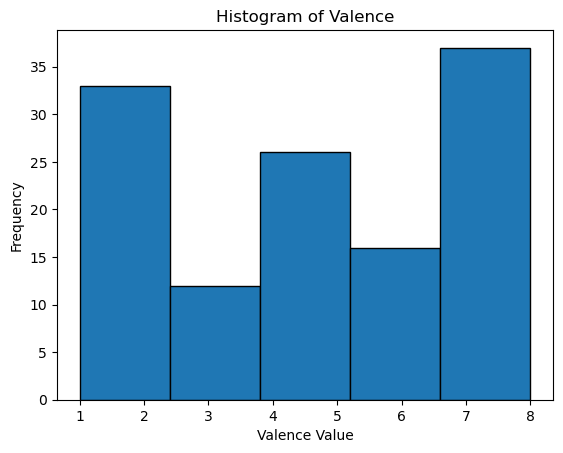

Mean of Valence_score: 4.604838709677419
Variance of Valence_score: 5.384170135275753


In [8]:
feature = df['Valence_score']

# Generate the histogram data (bins can be adjusted as needed)
hist, bin_edges = np.histogram(feature, bins=5)

# Plot the histogram
plt.hist(feature, bins=5, edgecolor='black')
plt.title('Histogram of Valence')
plt.xlabel('Valence Value')
plt.ylabel('Frequency')
plt.show()

# Calculate the mean and variance of the feature
mean = np.mean(feature)
variance = np.var(feature)

print("Mean of Valence_score:", mean)
print("Variance of Valence_score:", variance)

In [9]:
df.head()

,Valence_score,Arousal_score,class
0,6,0,Pleasant
1,5,1,Pleasant
2,2,1,unpleasant
3,3,0,unpleasant
4,8,1,Pleasant


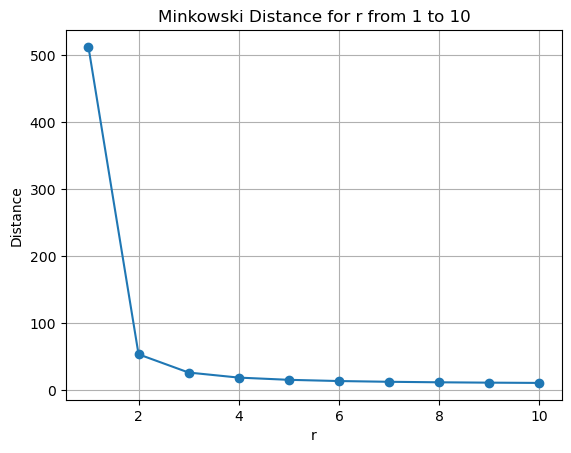

Minkowski distance with r=1: 512.0
Minkowski distance with r=2: 53.04714883949938
Minkowski distance with r=3: 25.815258486104234
Minkowski distance with r=4: 18.262957189232704
Minkowski distance with r=5: 14.944908410739307
Minkowski distance with r=6: 13.131869578986747
Minkowski distance with r=7: 12.008381467178484
Minkowski distance with r=8: 11.253282015960037
Minkowski distance with r=9: 10.716254047213877
Minkowski distance with r=10: 10.318090042347237


In [10]:
x = df['Valence_score'].values
y = df['Arousal_score'].values

# Calculate Minkowski distance for r from 1 to 10
distances = []
r_values = range(1, 11)

for r in r_values:
    distance = np.sum(np.abs(x - y) ** r) ** (1 / r)
    distances.append(distance)

# Plot the distances
plt.plot(r_values, distances, marker='o')
plt.title('Minkowski Distance for r from 1 to 10')
plt.xlabel('r')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

# Print the distances for each r
for r, dist in zip(r_values, distances):
    print(f"Minkowski distance with r={r}: {dist}")

In [11]:
from sklearn.model_selection import train_test_split


In [12]:
X = df[['Valence_score', 'Arousal_score']].values
y = df['class'].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [14]:
from sklearn.neighbors import KNeighborsClassifier


In [15]:
# Create a kNN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier using the training data
neigh.fit(X_train, y_train)

neigh.score(X_test, y_test)



0.7105263157894737

In [16]:
neigh.predict([X_test[0]])

array(['unpleasant'], dtype=object)

In [17]:
neigh = KNeighborsClassifier(n_neighbors=1)

# Train the classifier using the training data
neigh.fit(X_train, y_train)

neigh.score(X_test, y_test)



0.6842105263157895

In [18]:
neigh.predict([X_test[0]])

array(['Pleasant'], dtype=object)

In [19]:
from sklearn.metrics import accuracy_score


In [20]:
# List to store accuracy for different values of k
accuracies = []

# Vary k from 1 to 11
k_values = range(1, 12)

for k in k_values:
    # Create and train the kNN classifier with the current k
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = neigh.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f"Accuracy with k={k}: {accuracy}")



Accuracy with k=1: 0.6842105263157895
Accuracy with k=2: 0.631578947368421
Accuracy with k=3: 0.7105263157894737
Accuracy with k=4: 0.6842105263157895
Accuracy with k=5: 0.7105263157894737
Accuracy with k=6: 0.7105263157894737
Accuracy with k=7: 0.7631578947368421
Accuracy with k=8: 0.7105263157894737
Accuracy with k=9: 0.7105263157894737
Accuracy with k=10: 0.6842105263157895
Accuracy with k=11: 0.7631578947368421


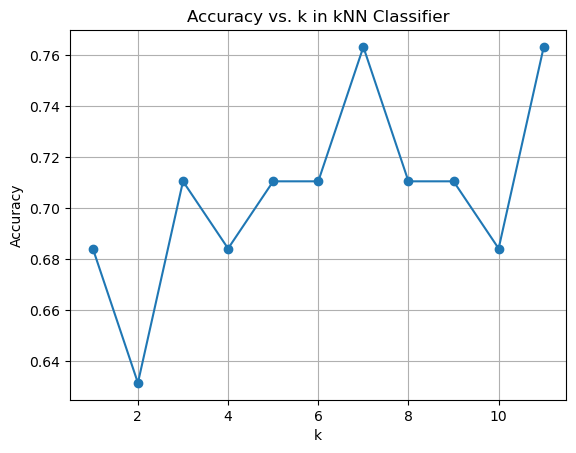

In [21]:
# Plot accuracy vs. k
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. k in kNN Classifier')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [22]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
import seaborn as sns

In [23]:
# Create a kNN classifier with k=3
neigh = KNeighborsClassifier(n_neighbors=3)

# Train the classifier using the training data
neigh.fit(X_train, y_train)

# Predict on both training and testing sets
y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)


Confusion Matrix - Training Data:
 [[11 17]
 [ 6 52]]
Confusion Matrix - Test Data:
 [[ 3  6]
 [ 5 24]]

Classification Report - Training Data:
              precision    recall  f1-score   support

    Pleasant       0.65      0.39      0.49        28
  unpleasant       0.75      0.90      0.82        58

    accuracy                           0.73        86
   macro avg       0.70      0.64      0.65        86
weighted avg       0.72      0.73      0.71        86


Classification Report - Test Data:
              precision    recall  f1-score   support

    Pleasant       0.38      0.33      0.35         9
  unpleasant       0.80      0.83      0.81        29

    accuracy                           0.71        38
   macro avg       0.59      0.58      0.58        38
weighted avg       0.70      0.71      0.70        38



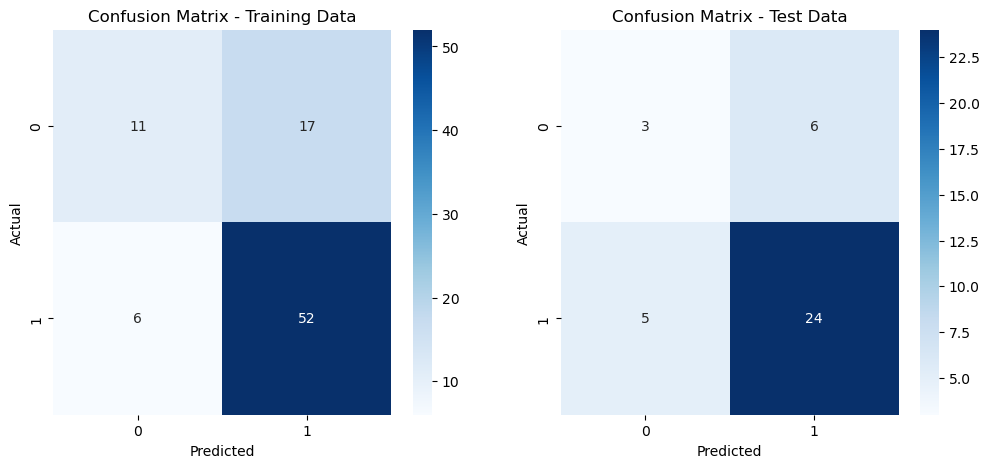

In [24]:
# Confusion matrix for training data
cm_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix - Training Data:\n", cm_train)

# Confusion matrix for test data
cm_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix - Test Data:\n", cm_test)

# Calculate precision, recall, and F1-score for training data
print("\nClassification Report - Training Data:")
print(classification_report(y_train, y_train_pred))

# Calculate precision, recall, and F1-score for test data
print("\nClassification Report - Test Data:")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Data')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Data')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.show()
